In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0].shape

(32, 32, 3)

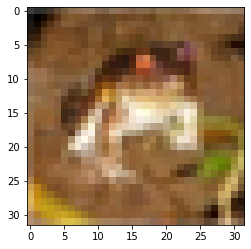

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train/255

In [8]:
X_test = X_test/255

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
Y_cat_train = to_categorical(Y_train, 10)

In [12]:
Y_cat_test = to_categorical(Y_test, 10)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = 'relu',))
# Pooling Layer
model.add(MaxPool2D(pool_size = (2, 2)))

# Convolutional Layer
model.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (32, 32, 3), activation = 'relu',))
# Pooling Layer
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [18]:
%%time
model.fit(X_train, Y_cat_train, epochs = 15, validation_data = (X_test, Y_cat_test), callbacks= [early_stop])

Epoch 1/15
1563/1563 [==============================] - 10s 4ms/step - loss: 1.4725 - accuracy: 0.4681 - val_loss: 1.2593 - val_accuracy: 0.5461
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1652 - accuracy: 0.5867 - val_loss: 1.1111 - val_accuracy: 0.6066
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0230 - accuracy: 0.6415 - val_loss: 1.0488 - val_accuracy: 0.6303
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9110 - accuracy: 0.6821 - val_loss: 0.9880 - val_accuracy: 0.6541
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8218 - accuracy: 0.7127 - val_loss: 0.9587 - val_accuracy: 0.6729
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7469 - accuracy: 0.7394 - val_loss: 0.9477 - val_accuracy: 0.6781
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6735 - accuracy: 0.7645 - val_loss: 0.9405 - val_accuracy

In [19]:
metrics = pd.DataFrame(model.history.history)

In [20]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.472506,0.46814,1.259311,0.5461
1,1.165206,0.58674,1.111132,0.6066
2,1.022960,0.64154,1.048793,0.6303
3,0.911009,0.68214,0.987974,0.6541
4,0.821828,0.71270,0.958727,0.6729
5,0.746888,0.73938,0.947688,0.6781
6,0.673470,0.76448,0.940534,0.6795
7,0.609414,0.78680,0.988955,0.6798
8,0.547068,0.80768,1.049687,0.6719


<AxesSubplot:>

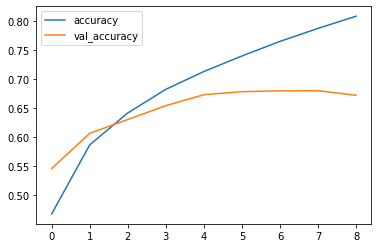

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

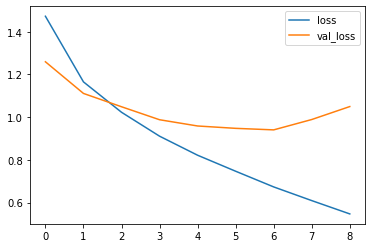

In [22]:
metrics[['loss', 'val_loss']].plot()

In [23]:
model.evaluate(X_test, Y_cat_test, verbose = 0)

[1.0496866703033447, 0.6718999743461609]

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
predictions = np.argmax(model.predict(X_test), axis=-1)

In [26]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1000
           1       0.82      0.76      0.79      1000
           2       0.65      0.51      0.57      1000
           3       0.52      0.47      0.49      1000
           4       0.64      0.61      0.62      1000
           5       0.60      0.53      0.56      1000
           6       0.77      0.72      0.74      1000
           7       0.65      0.76      0.70      1000
           8       0.78      0.77      0.77      1000
           9       0.63      0.84      0.72      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



<AxesSubplot:>

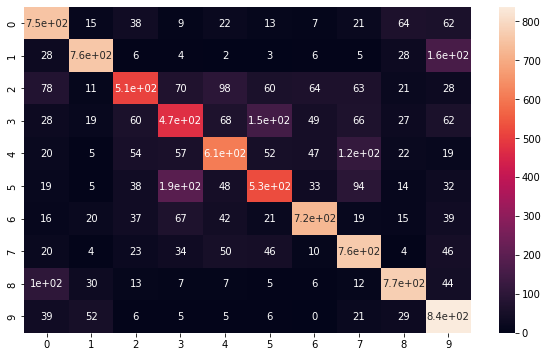

In [27]:
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True)

In [28]:
my_image = X_test[16]

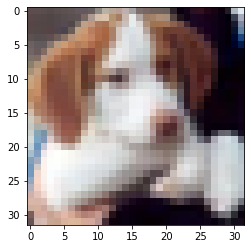

In [29]:
plt.imshow(my_image)

In [30]:
Y_test[16]

array([5], dtype=uint8)

In [31]:
np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)), axis=-1)

array([5], dtype=int64)